In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn  import cross_validation 
import lightgbm as lgb
import pickle

#import
train=pd.read_csv('haihu/train.csv')
demogra=pd.read_csv('haihu/demogra.csv')
merge=pd.merge(demogra, train, on='deviceId')

merge['osType'] = merge['osType'].replace('iOS',0).replace('ANDROID',1)
merge['gender'] = merge['gender'].replace('female',0).replace('male',1).replace('UNKNOWN',2)
merge['isMarried'] = merge['isMarried'].replace('yes',0).replace('no',1)
#age
age_ctgr_list = [10, 20, 30, 40, 50, 60, 70, 80]
age_ctgr = pd.cut(merge['age'], bins=age_ctgr_list)
#income
income_ctgr_list = [0,100,300,400,500,600,700,750]
income_ctgr = pd.cut(merge['income'], bins=income_ctgr_list)
#mediaId
list_ = pickle.load(open('mediaId_listfile', 'rb'))
listA = list(list_.index)[0:331]
listB = list(list_.index)[331:661]
listC = list(list_.index)[661:1001]
merge['mediaId'] = merge['mediaId'].replace(listA,1001).replace(listB, 1002).replace(listC, 1003)
#time
hour=pd.to_datetime(merge['timestamp'], unit = 's').dt.hour
dayofweek=pd.to_datetime(merge['timestamp'], unit = 's' ).dt.dayofweek



In [77]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.30)

In [78]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [79]:
lgbm_params = {}

In [80]:
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

KeyboardInterrupt: 

In [74]:
import pickle
# モデルを保存する
filename = 'LGdb4.sav'
pickle.dump(model, open(filename, 'wb'))

In [75]:
X_test=pd.concat([merge['bannerSize'], merge['bannerPosition'], (merge['floorPrice']/1000).astype(int), merge['mediaId'], merge['osType'], merge['gender'],merge['isMarried'], age_ctgr, income_ctgr, hour, dayofweek],axis=1)

loaded_model = pickle.load(open('Lgb_.sav', 'rb'))
y_pred = loaded_model.predict(X_test)

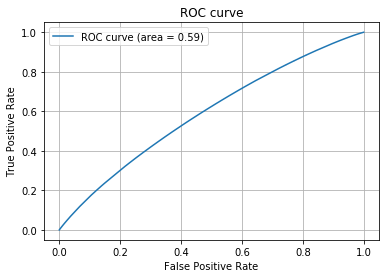

In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt

# FPR, TPR
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)

# AUC
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()